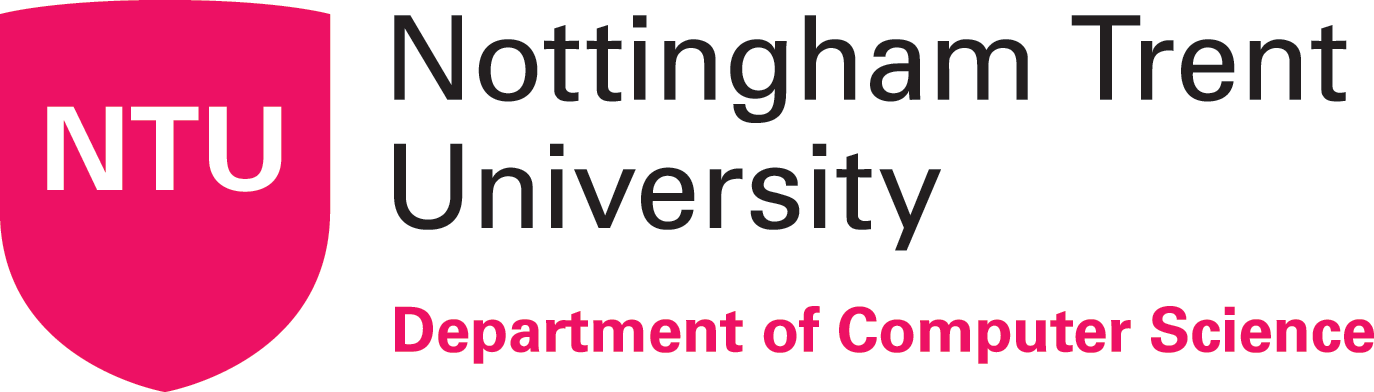

## SOFT40161 - Introduction to Computer Programming
## Submission of the Coursework

### Name: NWOGO EVERISTUS UGOCHUKWU
### NTU ID: N1280799

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-

<font  color= 'green'> **GitHub Link to access my work.** </font>

My GitHub Link: <a href="https://github.com/guavacoderepo/SOFT40161-COURSE-WORK.git"> (Click here)</a>

In [2]:
# import packages
import pandas as pd
import seaborn as sns
from pandas.core.series import Series
from pandas.core.frame import DataFrame

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 7)

# Section 1: Control Structures (16 marks)


In [2]:
# Explanation and Documentation 

In [22]:
# Evalauting percentage of missing values
def evalute_miss_values(df:DataFrame):
    miss_values = dict()
    for col in df.columns:
        val = (df[col].isnull().sum()/len(df))*100
        if val > 0:
            miss_values[col] = val

    return miss_values

In [26]:
# grouping ages into various categories
def group_age(age:int):
    group = None
    if age <= 20:
        group = '20 down'
    elif 30 >= age > 20:
        group = '21-30'
    elif 40 >= age > 30:
        group = '31-40'
    elif 50 >= age > 40:
        group = '41-50'
    else:
        group = '51 up'
    
    return group

In [64]:
# cleaning gender column using regular expression
def clean_gender(col:Series) -> Series:
    import re

    genders = list(col)
    male_pattern = r"^(?:cis\s)?(?:male|man|guy|m)(?:\s?\((?:cis|male)\))?$"
    female_pattern = r"^(?:cis\s)?(?:female|woman|f)(?:\s?\((?:cis|female)\))?$"
    new_gender = []  
    for gender in genders:
        if re.search(male_pattern, gender, re.IGNORECASE):
            new_gender.append('Male')
        elif re.search(female_pattern, gender, re.IGNORECASE):
            new_gender.append('Female')
            
    col = Series(new_gender)

    return col

In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [8]:
# pie chart plot
def plot_pie_chart(values: list, labels: list):
    plt.pie(values, labels=labels, autopct='%1.2f%%');

# bar chart plot function
def plot_bar_chart(x:list,y:list):
    
    plt.bar(x = x, height = y);
    plt.title('Missing values distribution', fontsize=14)
    plt.xticks(rotation=90, fontsize=10);


In [ ]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [73]:
# import dataset into pandas
url = 'dataset/medical_survey.csv'

df = pd.read_csv(url, index_col=0)
df.head()

,age,sex,bmi,children,smoker,region,charges
Id,,,,,,,
1,19,cis female,27.900,0,yes,southwest,16884.92400
2,18,male,33.770,1,no,southeast,1725.55230
3,28,guy,33.000,3,no,southeast,4449.46200
4,33,guy,22.705,0,no,NaN,21984.47061
5,32,m,28.880,0,no,northwest,3866.85520


In [67]:
# Checking the shape of the dataset
size = df.shape
print(f'The dataset has {size[1]} columns and {size[0]} rows')

The dataset has 7 columns and 1338 rows


In [49]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.652951,1.094918,13270.422265
std,14.049960,6.112962,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4740.287150
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1328 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [51]:
df.isnull().sum()

age          0
sex          0
bmi          8
children     0
smoker       0
region      10
charges      0
dtype: int64

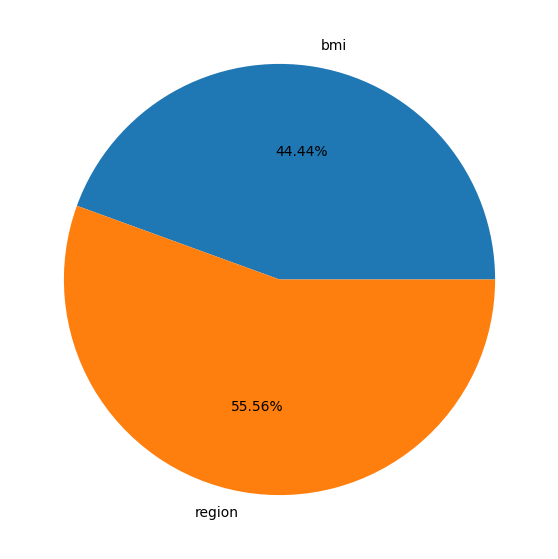

In [52]:
# ploting a pie chat of missing values
miss_values: dict = evalute_miss_values(df)
plot_pie_chart(miss_values.values(), miss_values.keys())

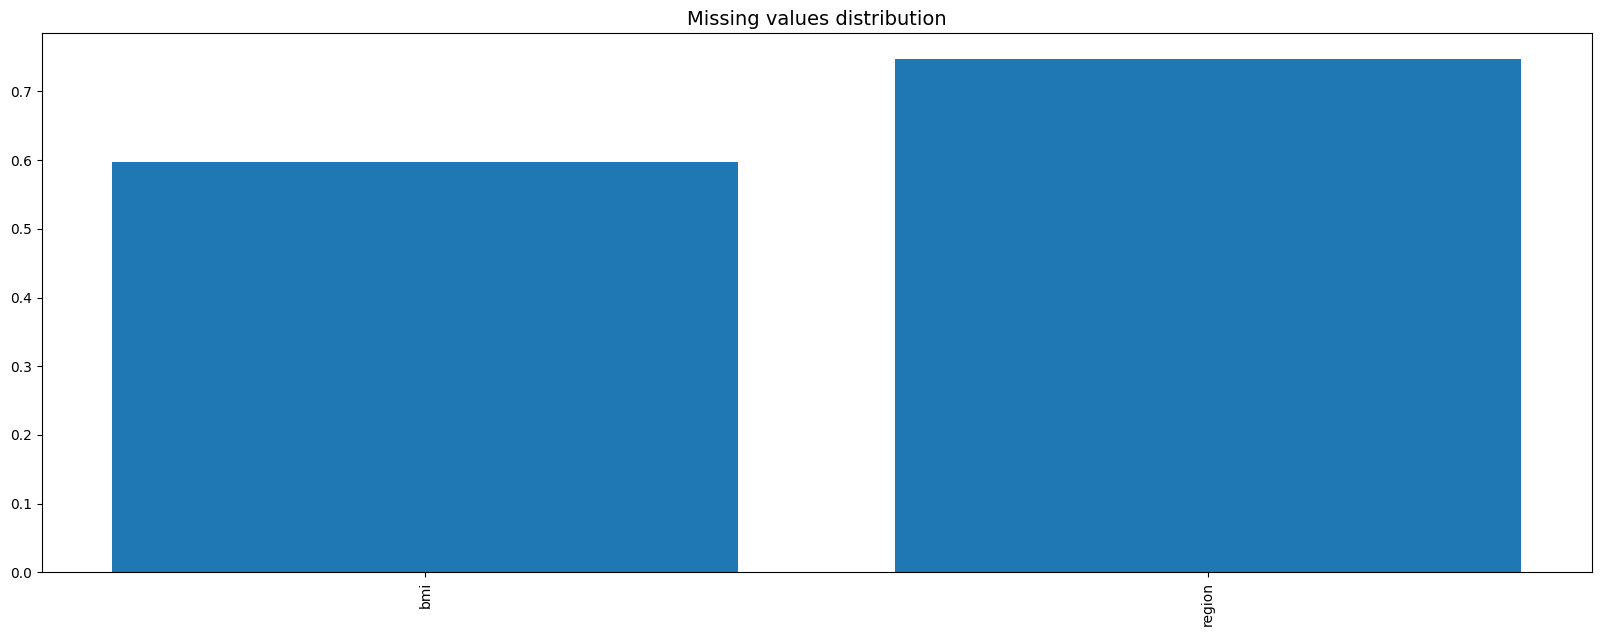

In [53]:
# Bar chart distribution of missing values
plot_bar_chart(miss_values.keys(), miss_values.values())

In [54]:
# grouping age 
df['age'] = df['age'].apply(group_age)
df.head()

,age,sex,bmi,children,smoker,region,charges
Id,,,,,,,
1,20 down,cis female,27.900,0,yes,southwest,16884.92400
2,20 down,male,33.770,1,no,southeast,1725.55230
3,21-30,guy,33.000,3,no,southeast,4449.46200
4,31-40,guy,22.705,0,no,NaN,21984.47061
5,31-40,m,28.880,0,no,northwest,3866.85520


In [75]:
# clean gender column
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])


# df['sex'] = clean_gender(df['sex'])
# df.head()

In [76]:
df['sex'].unique()

array(['cis female', 'male', 'guy', 'm', 'female', 'woman', 'male (cis)',
       'female (cis)', 'cis male', 'cis man', 'man', 'f',
       'cis-female/femme'], dtype=object)

In [56]:
df.isnull().sum()

age          0
sex          1
bmi          8
children     0
smoker       0
region      10
charges      0
dtype: int64

In [57]:
# fillna on self employed column
bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(round(bmi, 2))

df.head()

,age,sex,bmi,children,smoker,region,charges
Id,,,,,,,
1,20 down,Male,27.900,0,yes,southwest,16884.92400
2,20 down,Male,33.770,1,no,southeast,1725.55230
3,21-30,Male,33.000,3,no,southeast,4449.46200
4,31-40,Male,22.705,0,no,NaN,21984.47061
5,31-40,Female,28.880,0,no,northwest,3866.85520


In [58]:
region = df['region'].mode()[0]
df['region'] = df['region'].fillna(region)

In [59]:
df.isnull().sum()

age         0
sex         1
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
Id,,,,,,,
1,20 down,Male,27.900,0,yes,southwest,16884.92400
2,20 down,Male,33.770,1,no,southeast,1725.55230
3,21-30,Male,33.000,3,no,southeast,4449.46200
4,31-40,Male,22.705,0,no,southeast,21984.47061
5,31-40,Female,28.880,0,no,northwest,3866.85520


In [61]:
# working with sklearn library
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = ['age', 'sex', 'bmi', 'smoker','region']
for col in cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
Id,,,,,,,
1,0,1,197,0,1,3,16884.92400
2,0,1,351,1,0,2,1725.55230
3,1,1,332,3,0,2,4449.46200
4,2,1,73,0,0,2,21984.47061
5,2,0,223,0,0,1,3866.85520


In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [ ]:
# Explanation and Documentation 

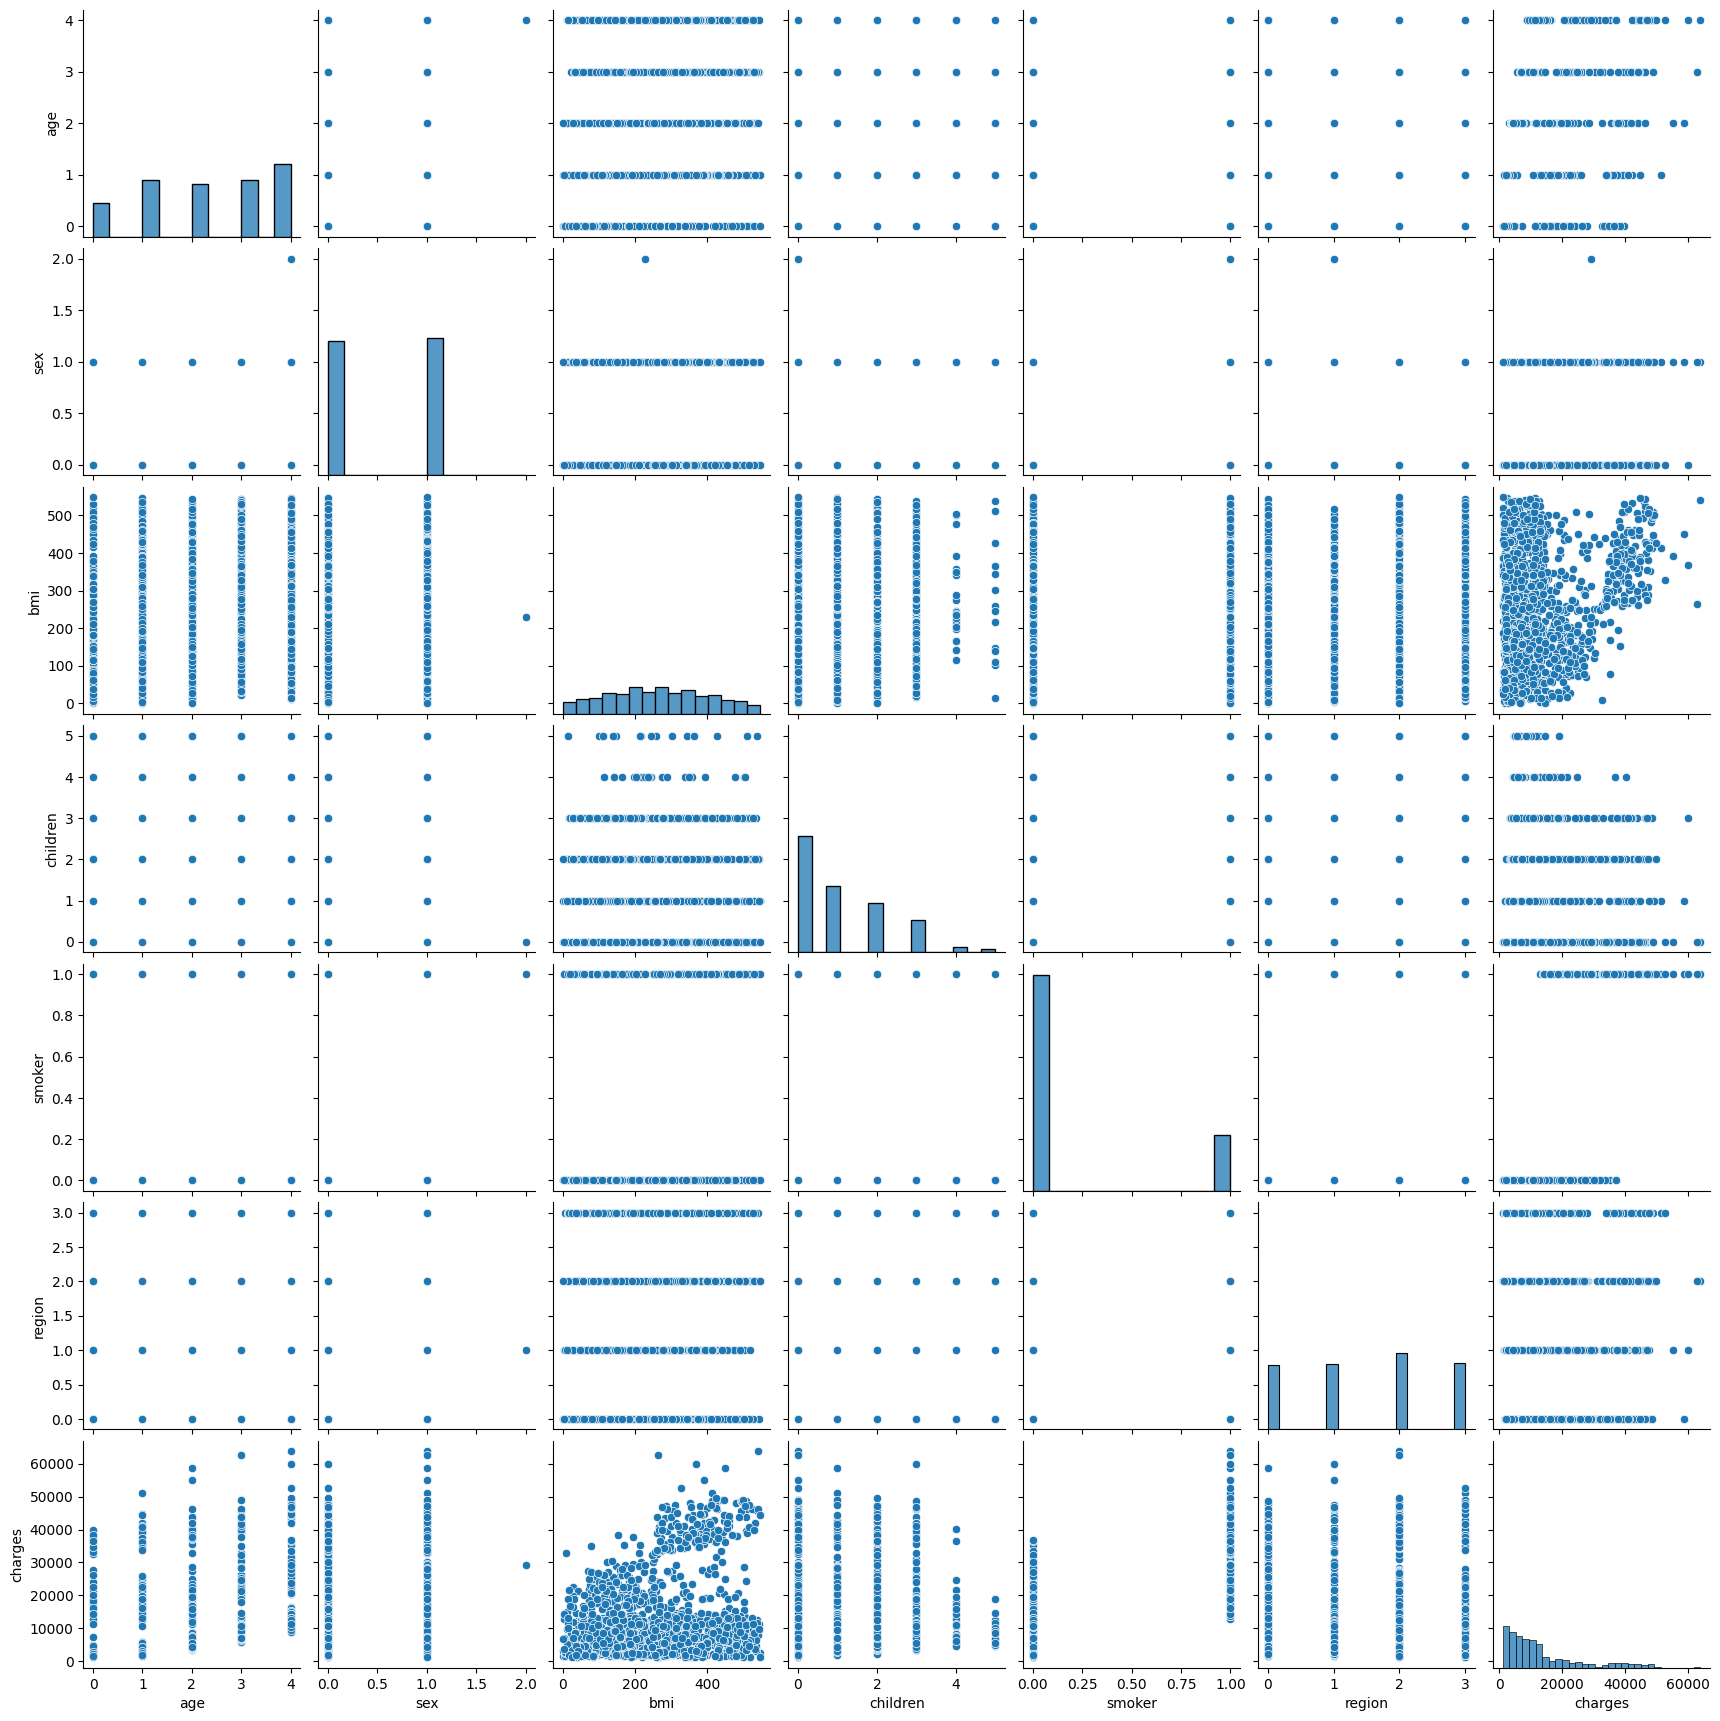

In [43]:
sns.pairplot(df, diag_kind='hist');

In [62]:
df['sex'].unique()

array([1, 0, 2, 3])

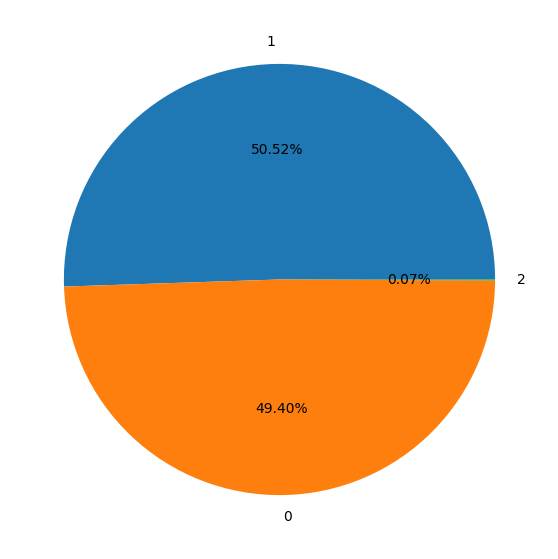

In [44]:
# check the gender distribution
gender_title = df['sex'].value_counts().index
gender_counts = df['sex'].value_counts().values

plot_pie_chart(gender_counts, gender_title)

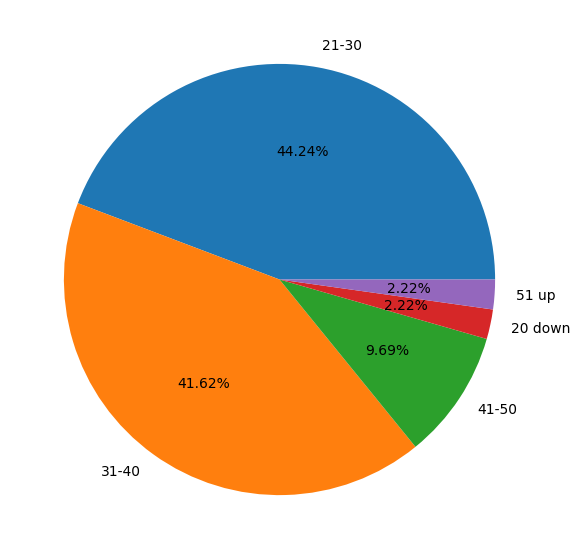

In [156]:
# check age distribution
age_title = df['Age'].value_counts().index
age_counts = df['Age'].value_counts().values

plot_pie_chart(age_counts, age_title)

In [120]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options
0,31-40,Female,United States,No,No,Yes,6-25,No,Somewhat easy,Not sure
1,41-50,Male,United States,No,No,No,More than 1000,Don't know,Don't know,No
2,31-40,Male,Canada,No,No,No,6-25,No,Somewhat difficult,No
3,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes
4,31-40,Male,United States,No,No,No,100-500,Don't know,Don't know,No


In [ ]:
grouped = df.groupby(['Gender','self_employed']).value_counts()



In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)